In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wine_fraud.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


### EDA

In [3]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<Axes: xlabel='quality', ylabel='count'>

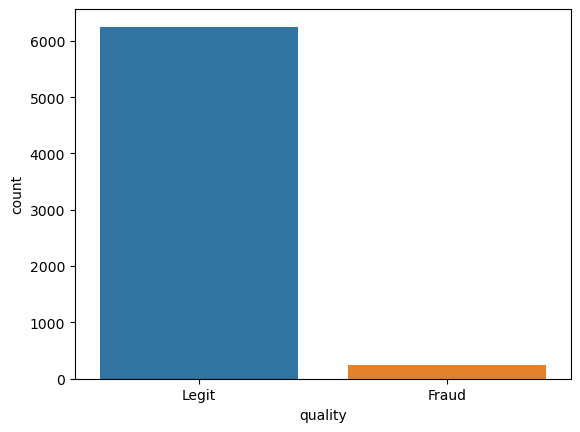

In [4]:
sns.countplot(x='quality',data=df)

In [36]:
df['quality'].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

In [5]:
df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

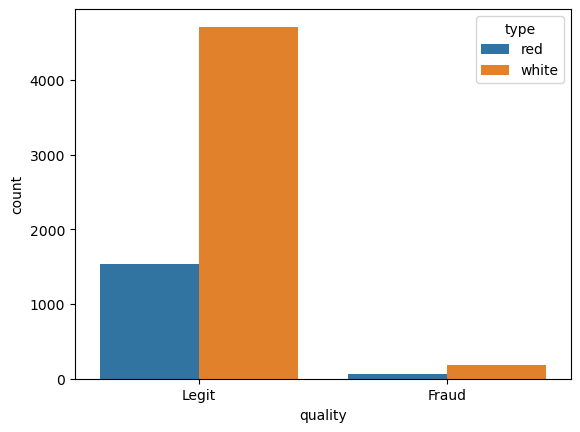

In [6]:
sns.countplot(x='quality',data=df, hue='type')

In [9]:
red = df[df['type']=='red']

In [10]:
white = df[df['type']=='white']

In [17]:
print('Percentage of fraud in red wines:', np.round(100*len(red[red['quality']=='Fraud'])/len(red),2))

Percentage of fraud in red wines: 3.94


In [18]:
print('Percentage of fraud in white wines:', np.round(100*len(white[white['quality']=='Fraud'])/len(white),2))

Percentage of fraud in white wines: 3.74


In [21]:
df['Fraud'] = df['quality'].map({'Legit':0,'Fraud':1})

<Axes: >

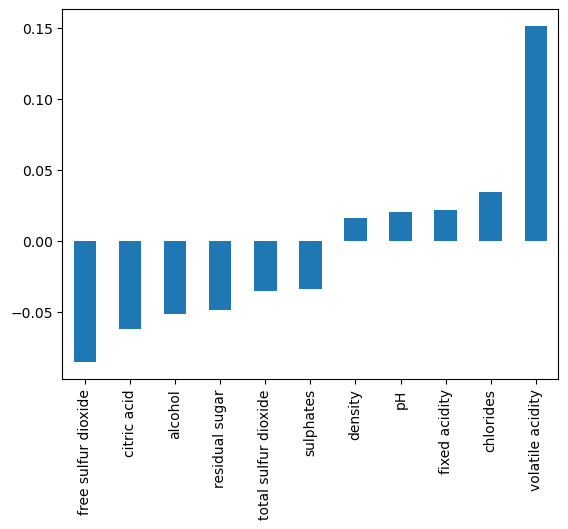

In [26]:
df.corr(numeric_only=True)['Fraud'][:-1].sort_values().plot(kind='bar')

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0


In [31]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)
df = df.drop('Fraud',axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,False


In [32]:
X = df.drop('quality',axis=1)
y = df['quality']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=101)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)

In [38]:
from sklearn.svm import SVC

svc = SVC(class_weight='balanced')

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.001,0.01,0.1,0.5,0.8,1], 'gamma':['scale','auto']}
grid = GridSearchCV(svc, param_grid)

In [40]:
grid.fit(sc_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.8, 1],
                         'gamma': ['scale', 'auto']})

In [41]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [43]:
grid_pred = grid.predict(sc_X_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,grid_pred)

array([[ 17,  10],
       [ 92, 531]])

In [45]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

